<a href="https://colab.research.google.com/github/Taryn-Cail/Python-Group-Project-2704/blob/main/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Testing: students with lower gpa have higher mental stress levels
#Variables: GPA (independnt), Mental Stress Level (dependent)

#Calc average stress levels for those with different GPA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Load the data set with only the required columns
df = pd.read_csv('data.csv')
df = df[['Student ID', 'Mental Stress Level', 'Academic Performance (GPA)']]
print(df)

      Student ID  Mental Stress Level  Academic Performance (GPA)
0    802-17-3671                    9                           2
1    871-12-8572                    9                           0
2    495-13-2672                    9                           0
3    365-77-2496                    1                           2
4    664-76-5622                    7                           0
..           ...                  ...                         ...
755  826-89-7993                    2                           2
756  681-15-6754                    1                           3
757  714-33-5373                    9                           1
758  849-54-1252                    2                           1
759  862-68-5364                    4                           3

[760 rows x 3 columns]


In [ ]:
#Grouping GPA into levels
def categorize_gpa(gpa):
  #0-2 low
  #2-3 med
  #3-4 high
  if gpa <= 2:
    return 'Low'
  elif gpa >2 and gpa <= 3:
    return 'Med'
  elif gpa > 3:
    return 'High'

#Create new col for GPA groups
df['GPA Level'] = df['Academic Performance (GPA)'].apply(categorize_gpa)
print(df)
print(type(df)) #Data frame
print(type(df['GPA Level'])) #Each col is a Series



      Student ID  Mental Stress Level  Academic Performance (GPA) GPA Level
0    802-17-3671                    9                           2       Low
1    871-12-8572                    9                           0       Low
2    495-13-2672                    9                           0       Low
3    365-77-2496                    1                           2       Low
4    664-76-5622                    7                           0       Low
..           ...                  ...                         ...       ...
755  826-89-7993                    2                           2       Low
756  681-15-6754                    1                           3       Med
757  714-33-5373                    9                           1       Low
758  849-54-1252                    2                           1       Low
759  862-68-5364                    4                           3       Med

[760 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series

In [ ]:
#Calculate mean stress for GPA groups
#groupby() groups by col
#[]"Mental Stress Level"].mean() calculates mean stress level for each group
#resetindex() converts back into data
stress_by_gpa = df.groupby('GPA Level')['Mental Stress Level'].mean().reset_index()
print(stress_by_gpa)


  GPA Level  Mental Stress Level
0      High             5.517483
1       Low             5.416107
2       Med             5.094118


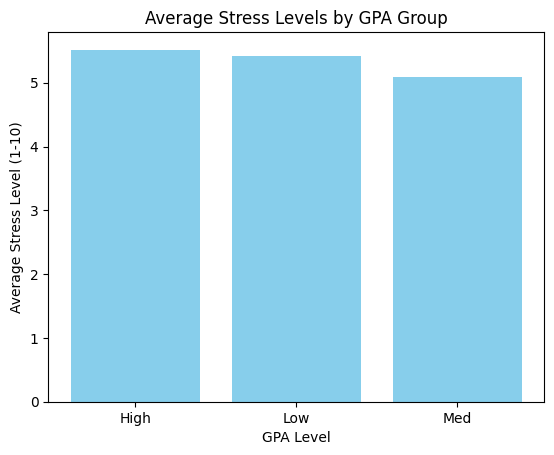

In [ ]:
#Visualize - bar graph
plt.clf()
plt.bar(stress_by_gpa['GPA Level'], stress_by_gpa['Mental Stress Level'], color='skyblue')
plt.xlabel("GPA Level")
plt.ylabel("Average Stress Level (1-10)")
plt.title("Average Stress Levels by GPA Group")
plt.show()

[]

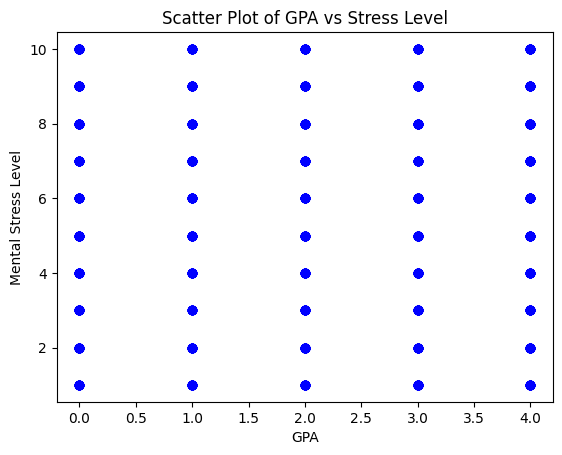

In [ ]:
#Visualize - scatter plot

plt.clf()
plt.scatter(df['Academic Performance (GPA)'], df['Mental Stress Level'], color='blue', marker='o')
plt.xlabel('GPA')
plt.ylabel('Mental Stress Level')
plt.title('Scatter Plot of GPA vs Stress Level')
plt.plot()